In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets

from sklearn.model_selection import GridSearchCV, KFold,StratifiedKFold, cross_val_score ,learning_curve ,ShuffleSplit,validation_curve,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE 

# Data Import, Exploration and Cleansing

In [2]:
#### import the data as dataframe
data = pd.read_csv ('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [4]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
#### get the statistics of the numerical attributes and target variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
#### preview the the data type of all attributes and target varibles
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
data.shape

(5110, 12)

In [8]:
data = data[data['gender'] != 'Other'].reset_index() # drop the class 'Other' in gender features which only has on
                                                     # instance

In [9]:
data

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
import matplotlib.ticker as mtick

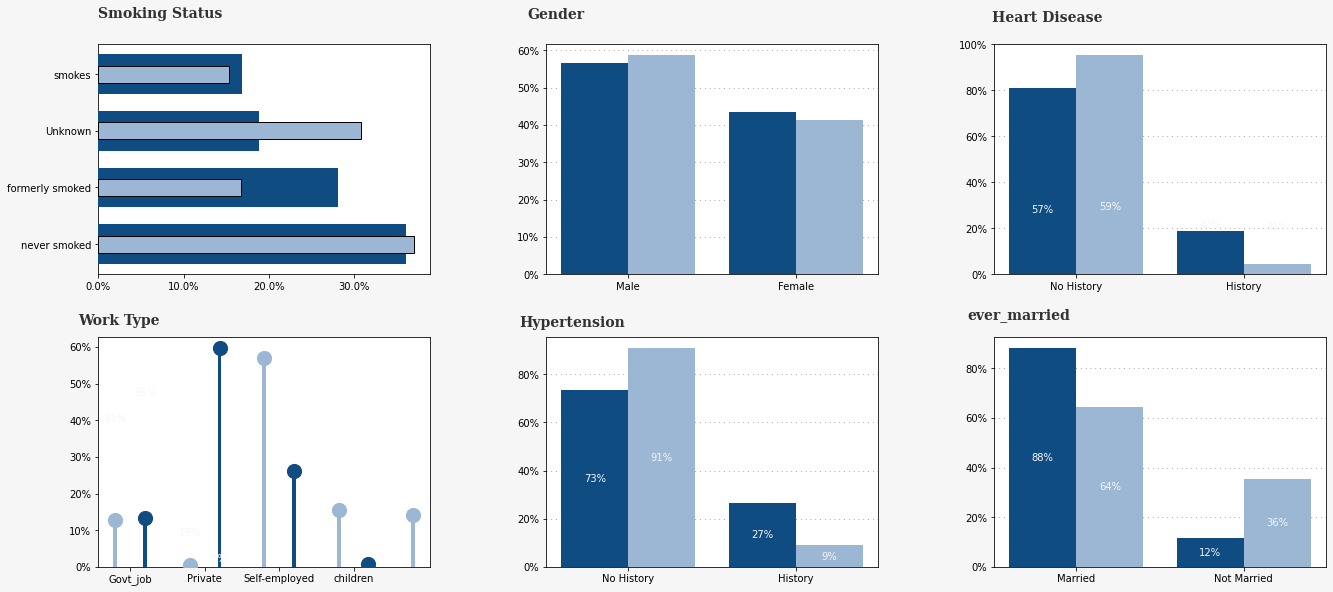

In [11]:
#### the visualization code is cited from: 

fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

str_only = data[data['stroke']==1]
no_str_only = data[data['stroke']==0]

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color
# Smoking
positive = pd.DataFrame(str_only["smoking_status"].value_counts())
positive["Percentage"] = positive["smoking_status"].apply(lambda x: x/sum(positive["smoking_status"])*100)
negative = pd.DataFrame(no_str_only["smoking_status"].value_counts())
negative["Percentage"] = negative["smoking_status"].apply(lambda x: x/sum(negative["smoking_status"])*100)

ax0.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.barh(positive.index, positive['Percentage'], color="#0f4c81", zorder=3, height=0.7)
ax0.barh(negative.index, negative['Percentage'], color="#9bb7d4", zorder=3,ec='black', height=0.3)
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(10))

# Ax2 - GENDER 
positive = pd.DataFrame(str_only["gender"].value_counts())
positive["Percentage"] = positive["gender"].apply(lambda x: x/sum(positive["gender"])*100)
negative = pd.DataFrame(no_str_only["gender"].value_counts())
negative["Percentage"] = negative["gender"].apply(lambda x: x/sum(negative["gender"])*100)

x = np.arange(len(positive))
ax1.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax1.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax1.set_xticks(x + 0.4 / 2)
ax1.set_xticklabels(['Male','Female'])
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


# Heart Dis

positive = pd.DataFrame(str_only["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x/sum(positive["heart_disease"])*100)
negative = pd.DataFrame(no_str_only["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x/sum(negative["heart_disease"])*100)

x = np.arange(len(positive))
ax2.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['No History','History'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# Work Type

positive = pd.DataFrame(str_only["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x/sum(positive["work_type"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_str_only["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x/sum(negative["work_type"])*100)
negative = negative.sort_index()

ax3.bar(negative.index, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.05)
ax3.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="#9bb7d4")
ax3.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.05)
ax3.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="#0f4c81")

ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax3.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax3.set_xticklabels(list(positive.index),rotation=0)
ax3.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

# hypertension

positive = pd.DataFrame(str_only["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)
negative = pd.DataFrame(no_str_only["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax4.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax4.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax4.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax4.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax4.set_xticks(x + 0.4 / 2)
ax4.set_xticklabels(['No History','History'])
ax4.yaxis.set_major_formatter(mtick.PercentFormatter())
ax4.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax4.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax4.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# marriage

positive = pd.DataFrame(str_only["ever_married"].value_counts())
positive["Percentage"] = positive["ever_married"].apply(lambda x: x/sum(positive["ever_married"])*100)
negative = pd.DataFrame(no_str_only["ever_married"].value_counts())
negative["Percentage"] = negative["ever_married"].apply(lambda x: x/sum(negative["ever_married"])*100)

x = np.arange(len(positive))
ax5.text(-0.45, 100, 'ever_married', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax5.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax5.set_xticks(x + 0.4 / 2)
ax5.set_xticklabels(['Married','Not Married'])
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    

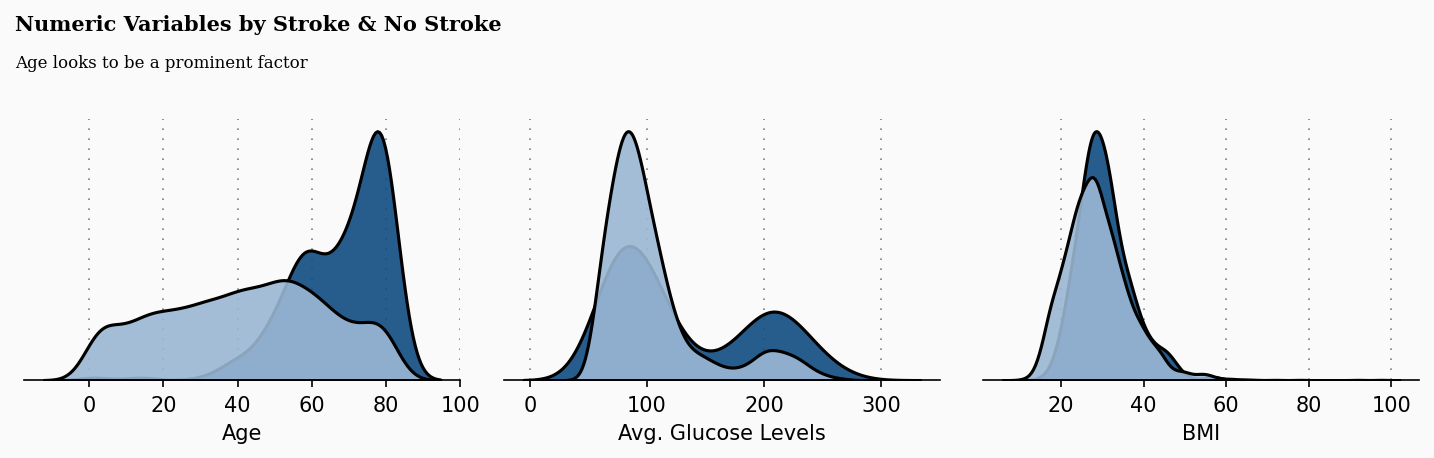

In [12]:
background_color = "#fafafa"
conts = ['age','avg_glucose_level','bmi']

fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = data[data['stroke'] == 1]
ns = data[data['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=10, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor', 
         fontsize=8, fontweight='light', fontfamily='serif')

plt.show()

# Dealing with Imbalanced Target Variable with Smote Function

In [13]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [14]:
#### split dataset to target variable and features dataset
X = data.loc[:,'gender':'smoking_status']
y = data.loc[:,'stroke']

In [15]:
#### Create n-1 dummy variables for categorical variables in all features
X = pd.get_dummies(X,
               drop_first = True)

In [16]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,83.75,NaN,0,1,0,1,0,0,1,0,1,0
5105,81.0,0,0,125.20,40.0,0,1,0,0,1,0,1,0,1,0
5106,35.0,0,0,82.99,30.6,0,1,0,0,1,0,0,0,1,0
5107,51.0,0,0,166.29,25.6,1,1,0,1,0,0,0,1,0,0


In [17]:
#### encode all categorical varibles with numerical values
le=LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)

[0 1]


In [18]:
X.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
gender_Male                         0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [19]:
#### imputation of missing value in the dataset
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 10, weights = 'uniform') # use the 10 neighbors to get estimations for missing value
                                                            # in the features dataset
drop_missing = imputer.fit_transform(X)

In [20]:
X['bmi'] = pd.DataFrame(drop_missing)[4] # replace missing values in bmi with the estimations from KNN imputation

In [21]:
# the current ratio of imbalanced target variable
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 4860, 1: 249})


In [22]:
####Oversample the imbalanced target variables

sm = SMOTE(random_state=42,sampling_strategy = 0.7)
X_oversample, y_oversample = sm.fit_resample(X,y)



In [23]:
# the ratio of target variable after oversample
print('Original dataset shape %s' % Counter(y_oversample))

Original dataset shape Counter({0: 4860, 1: 3402})


In [24]:
# create the dataset after oversample
data_oversample = X_oversample.copy()
data_oversample['stroke'] = y_oversample

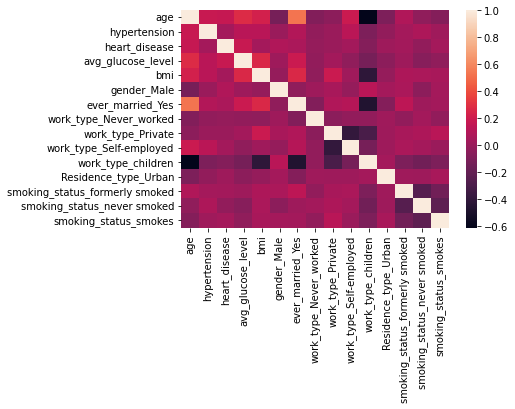

In [25]:
#### plot the pair-wise correations for all features
from scipy import stats
import seaborn as sns
corr = round(X_oversample.corr(),2)
sns.heatmap(corr)


In [26]:
# Check any two variables have correlation above 0.7
multi_count = 0
for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        if abs(corr.iloc[i,j]) > 0.7 and abs(corr.iloc[i,j]) < 1:
            multi_count += 1
print(multi_count)

0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample,              
                                                    y_oversample, 
                                                    test_size=0.20, 
                                                    random_state=42)

# Model Building and Hyperparameter Tuning

In [28]:
np.random.seed(42) 
inner_cv = KFold(n_splits=5, shuffle=True,random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True,random_state=42)

# decision tree
np.random.seed(42) 

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, None], 
                               'criterion':['gini','entropy']
                              }],
                  scoring='f1',
                  cv=inner_cv)

gs_dt = gs_dt.fit(X_oversample,y_oversample)

print("\n Parameter Tuning for decision tree")
print("Non-nested CV F1: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)


nested_score_gs_dt = cross_val_score(gs_dt, X=X_oversample, y=y_oversample, cv=outer_cv)
print("Nested CV F1: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


 Parameter Tuning for decision tree
Non-nested CV F1:  0.8909226240042024
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 19}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state=42)
Nested CV F1:  0.8894715941807784  +/-  0.006353031822279554


In [44]:
# knn
#Normalize Data
pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier(p=2, 
                                     metric='minkowski')) 
      ])
params = {
        'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['l1','l2']
    }

gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn = gs_knn.fit(X_oversample,y_oversample)  
print("\n Parameter Tuning for knn")
print("Non-nested CV F1: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn2 = cross_val_score(gs_knn, X=X_oversample, y=y_oversample, cv=outer_cv)
print("Nested CV F1: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())


 Parameter Tuning for knn
Non-nested CV F1:  0.8984527513266359
Optimal Parameter:  {'knn__metric': 'l1', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(metric='l1', n_neighbors=1))])
Nested CV F1:  0.8977270661942353  +/-  0.005597450034698921


In [30]:
# logistic
#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2']}],
                  scoring='f1',
                  cv=inner_cv)

gs_lr2 = gs_lr2.fit(X_oversample,y_oversample)
print("\n Parameter Tuning for logistic")
print("Non-nested CV F1: ", gs_lr2.best_score_)
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)

nested_score_gs_lr2 = cross_val_score(gs_lr2, X=X_oversample, y=y_oversample, cv=outer_cv)
print("Nested CV F1:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())
 


 Parameter Tuning for logistic
Non-nested CV F1:  0.8321418747840961
Optimal Parameter:  {'C': 1, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=1, random_state=42, solver='liblinear')
Nested CV F1: 0.8325966809965009  +/-  0.006616719926688581


# Model Evaluation

In [31]:
np.linspace(.1, 1.0, 10)

%matplotlib inline
from sklearn.model_selection import learning_curve # determines cross-validated training and test scores for different training set sizes


############################## Function for Learning Curves ##############################

def plot_learning_curve(estimator,        # data science algorithm
                        title,            # title of the plot
                        X, y,             # data (features and target variable)
                        ylim=None,        # minimum and maximum y values plotted
                        cv=None,          # cross validation splits
                        n_jobs=1,         # parallell estimation using multiple processors
                        train_sizes=np.linspace(.1, 1.0, 10)): #linspace returns evenly spaced numbers over a specified interval (start, stop, num)


    

    plt.figure()                    # display figure
    plt.title(title)                # specify title based on parameter provided as input
    if ylim is not None:            # if ylim was specified as an input, make sure the plots use these limits
        plt.ylim(*ylim)
    plt.xlabel("Training examples") # y label title
    plt.ylabel("Score")             # x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    # Detailed documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
    # train_sizes = numbers of training examples that has been used to generate the learning curve
    # train_scores = scores on training sets (array)
    # test_scores = scores on test set (array) 
    train_sizes, train_scores, test_scores = learning_curve(estimator, # data science algorithm
                                                            X, y,      # data (features and target variable)  
                                                            cv=cv,     # cross-validation folds
                                                            n_jobs=n_jobs, # number of jobs to run in parallel using multiple processors
                                                            train_sizes=train_sizes) # relative or absolute numbers of training examples 
                                                                                     # that will be used to generate the learning curve
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis.

    plt.grid()                                        # configure the grid lines in the plot

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes,                            # the x coordinates of the nodes defining the curves
                     train_scores_mean - train_scores_std,   # the y coordinates of the nodes defining the first curve
                     train_scores_mean + train_scores_std,   # the y coordinates of the nodes defining the second curve
                     alpha=0.1,                              # level of transparency in the color fill
                     color="r")                              # train data performance indicated with red
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1,
                     color="g")                              # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes,                                    # the horizontal coordinates of the data points 
             train_scores_mean,                              # the vertical coordinates of the data points
             'o-',                                           # o- will produce a small circle and a solid line to connect the markers
             color="r",                                      # line of red color
             label="Training score")                         # specify label title for this plot
    
    # Test data performance indicated with green
    plt.plot(train_sizes, 
             test_scores_mean, 
             'o-', 
             color="g",                                      # line of green color
             label="Cross-validation score")

    plt.legend(loc="best")                      # show legend of the plot at the best location possible
    return plt                                  # function that returns the plot as an output

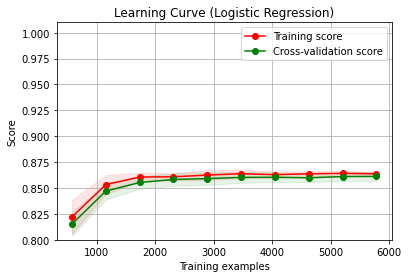

In [32]:
########################### Visualization of Learning Curves ###########################

title = "Learning Curve (Logistic Regression)"

# Class ShuffleSplit is a random permutation cross-validator
cv = ShuffleSplit(n_splits=10,          # number of re-shuffling & splitting iterations
                  test_size=0.3,        # represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
                  random_state=42)      # the seed used by the random number generator
estimator = LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')       # build multiple LR models as we increase the size of the traning data

# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator,      # data science algorithm
                    title,          # title of the plot
                    X_oversample, y_oversample,           # data (features and target variable)
                    (0.8, 1.01),    # minimum and maximum y values plotted
                    cv=cv,          # cross-validation folds (produced above)
                    n_jobs=4)       # parallell estimation using multiple processors

plt.show()                          # display the figure

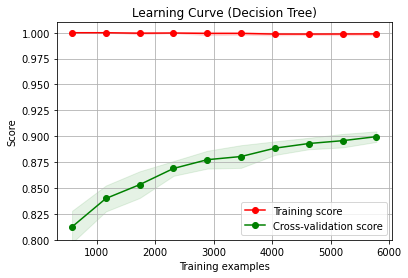

In [33]:
########################### Visualization of Learning Curves ###########################

title = "Learning Curve (Decision Tree)"

# Class ShuffleSplit is a random permutation cross-validator
cv = ShuffleSplit(n_splits=10,          # number of re-shuffling & splitting iterations
                  test_size=0.3,        # represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
                  random_state=42)      # the seed used by the random number generator
estimator = DecisionTreeClassifier(random_state=42,criterion= 'entropy', max_depth = 19)       # build multiple LR models as we increase the size of the traning data

# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator,      # data science algorithm
                    title,          # title of the plot
                    X_oversample, y_oversample,           # data (features and target variable)
                    (0.8, 1.01),    # minimum and maximum y values plotted
                    cv=cv,          # cross-validation folds (produced above)
                    n_jobs=4)       # parallell estimation using multiple processors

plt.show()                          # display the figure

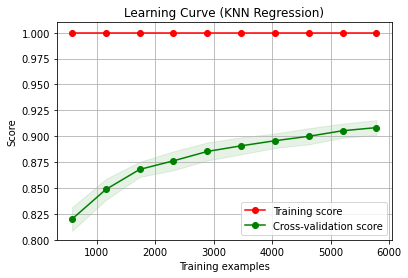

In [34]:
########################### Visualization of Learning Curves ###########################

title = "Learning Curve (KNN Regression)"

# Class ShuffleSplit is a random permutation cross-validator
cv = ShuffleSplit(n_splits=10,          # number of re-shuffling & splitting iterations
                  test_size=0.3,        # represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
                  random_state=42)      # the seed used by the random number generator
estimator = Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1,metric= 'l2',weights= 'uniform'))])       # build multiple LR models as we increase the size of the traning data

# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator,      # data science algorithm
                    title,          # title of the plot
                    X_oversample, y_oversample,           # data (features and target variable)
                    (0.8, 1.01),    # minimum and maximum y values plotted
                    cv=cv,          # cross-validation folds (produced above)
                    n_jobs=4)       # parallell estimation using multiple processors

plt.show()                          # display the figure

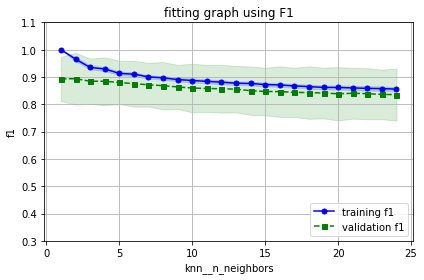

In [35]:
############################## Visualization - Fitting Graph - KNN ##############################


param_range = [*range(1,25,1)]

train_scores, test_scores = validation_curve( 
                estimator=Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 
                X=X_oversample,                                    
                y=y_oversample,                                    
                param_name="knn__n_neighbors",                               
                param_range=param_range,                      
                cv=10,                                        # 10-fold cross-validation
                scoring="f1",                           # evaluation metric
                n_jobs=4)        




#Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis (train data)
train_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis (train data)
test_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis (test data)
test_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis (test data)

# Plot train f1 means of cross-validation for all the parameters C in param_range
plt.plot(param_range,                     # the horizontal coordinates of the data points 
         train_mean,                      # the vertical coordinates of the data points
         color='blue',                    # aesthetic parameter - color
         marker='o',                      # aesthetic parameter - marker
         markersize=5,                    # aesthetic parameter - size of marker
         label='training f1')       # specify label title

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range,             # the x coordinates of the nodes defining the curves
                 train_mean + train_std,  # the y coordinates of the nodes defining the first curve
                 train_mean - train_std,  # the y coordinates of the nodes defining the second curve
                 alpha=0.15,              # level of transparency in the color fill
                 color='blue')            # aesthetic parameter - color

# Plot test f1 means of cross-validation for all the parameters C in param_range
plt.plot(param_range, 
         test_mean, 
         color='green', 
         linestyle='--', 
         marker='s', 
         markersize=5, 
         label='validation f1')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
# plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('knn__n_neighbors')
plt.ylabel('f1')
plt.title('fitting graph using F1')
plt.ylim([0.3, 1.1]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()                            # display the figure



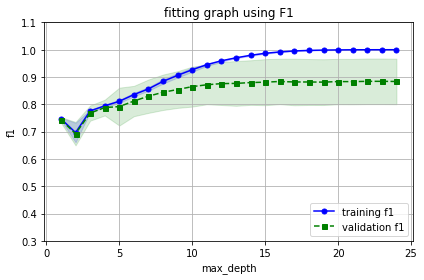

In [36]:
############################## Visualization - Fitting Graph- Decision Tree ##############################


param_range = [*range(1,25,1)]

train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(random_state=42,criterion= 'entropy'), 
                X=X_oversample,                                    
                y=y_oversample,                                    
                param_name="max_depth",                               
                param_range=param_range,                      
                cv=10,                                        # 10-fold cross-validation
                scoring="f1",                           # evaluation metric
                n_jobs=4)        




#Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis (train data)
train_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis (train data)
test_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis (test data)
test_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis (test data)

# Plot train f1 means of cross-validation for all the parameters C in param_range
plt.plot(param_range,                     # the horizontal coordinates of the data points 
         train_mean,                      # the vertical coordinates of the data points
         color='blue',                    # aesthetic parameter - color
         marker='o',                      # aesthetic parameter - marker
         markersize=5,                    # aesthetic parameter - size of marker
         label='training f1')       # specify label title

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range,             # the x coordinates of the nodes defining the curves
                 train_mean + train_std,  # the y coordinates of the nodes defining the first curve
                 train_mean - train_std,  # the y coordinates of the nodes defining the second curve
                 alpha=0.15,              # level of transparency in the color fill
                 color='blue')            # aesthetic parameter - color

# Plot test f1 means of cross-validation for all the parameters C in param_range
plt.plot(param_range, 
         test_mean, 
         color='green', 
         linestyle='--', 
         marker='s', 
         markersize=5, 
         label='validation f1')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
# plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.title('fitting graph using F1')
plt.ylim([0.3, 1.1]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()                            # display the figure



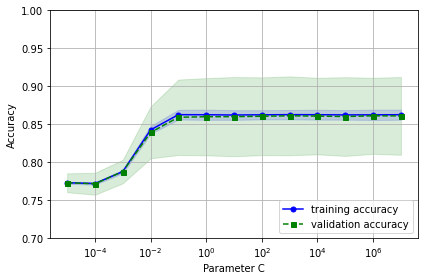

In [37]:
############################## Visualization - Fitting Graph- Logistics Regression ##############################

param_range = [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000]
train_scores, test_scores = validation_curve( 
                estimator=LogisticRegression(random_state=42), # build Logistic Regression models
                X=X_oversample,                                    # data (features)
                y=y_oversample,                                    # target variable
                param_name="C",                               # parameter C: Inverse of regularization strength; 
                                                              # must be a positive float. Smaller values of paramter C specify 
                                                              # stronger regularization.
                param_range=param_range,                      # the values of the parameter that will be evaluated

                cv=10,                                        # 10-fold cross-validation
                scoring="accuracy",                           # evaluation metric
                n_jobs=4)         # number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. 
                                  # this parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of 
                                  # whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis (train data)
train_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis (train data)
test_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis (test data)
test_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis (test data)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,                     # the horizontal coordinates of the data points 
         train_mean,                      # the vertical coordinates of the data points
         color='blue',                    # aesthetic parameter - color
         marker='o',                      # aesthetic parameter - marker
         markersize=5,                    # aesthetic parameter - size of marker
         label='training accuracy')       # specify label title

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range,             # the x coordinates of the nodes defining the curves
                 train_mean + train_std,  # the y coordinates of the nodes defining the first curve
                 train_mean - train_std,  # the y coordinates of the nodes defining the second curve
                 alpha=0.15,              # level of transparency in the color fill
                 color='blue')            # aesthetic parameter - color

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, 
         test_mean, 
         color='green', 
         linestyle='--', 
         marker='s', 
         markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()                            # display the figure

10-fold cross validation:

ROC AUC: 0.94 (+/- 0.05) [Logistic regression]
ROC AUC: 0.91 (+/- 0.06) [Decision tree]
ROC AUC: 0.92 (+/- 0.06) [kNN]


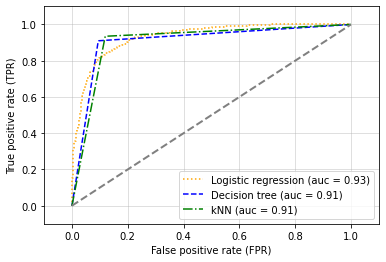

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X_oversample,              
                                                    y_oversample, 
                                                    test_size=0.20, 
                                                    random_state=1)



# Logistic Regression Classifier
clf1 = LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=42,criterion= 'entropy', max_depth = 19)

# kNN Classifier

clf3 = Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1,metric= 'l2',weights= 'uniform'))])

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################


print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  # estimate AUC based on cross validation
                             X=X_oversample,
                             y=y_oversample,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" # print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # colors for visualization
linestyles = [':', '--', '-.', '-']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # make predictions based on the classifiers
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                                    # plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # where to place the legend
plt.plot([0, 1], [0, 1],         # visualize random classifier
         linestyle='--',         # aesthetic parameters
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

# Profit Curve

Source: https://github.com/SydneyLauren/Profit-curves-and-xkcd-plotting/blob/master/Profit_Curves.ipynb

In [39]:
def standard_confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))
    return np.array([[TP,FP],[FN,TN]])

In [40]:
def profit_curve(cb, predict_probas, labels):
    #predict_probas = round(predict_probas,4)
    data = pd.DataFrame({"pred":predict_probas,"labels":labels})
    data.sort_values("pred",inplace=True)
    sorted_probs = data["pred"].to_numpy()
    sorted_labels = data["labels"].to_numpy()
    profit_list = []
    
    for sp, sl in zip(sorted_probs, sorted_labels):
        predict_labels = sorted_probs > sp + .0001
        conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
        profit_list.append((cb * conf_mat).sum() / float(len(labels)))
    return profit_list, sorted_probs

In [41]:
# Plot the profit curves
def plot_profit_curve(model, label, costbenefit, X_train, X_test, y_train, y_test, col):
    model.fit(X_train, y_train)
    predict_probas = model.predict_proba(X_test)[:,1]
    y_pred  =  model.predict(X_test)
    cm = standard_confusion_matrix(y_test,y_pred)
    cl_report = classification_report(y_test,y_pred)
    print(f"{label} Classification report: \n {cl_report}")
    print(f"{label} Expected Profit: ${((cm/cm.sum()) * costbenefit).sum():.2f}")
    print("-"*50)
    profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
    max_index = np.argmax(profit_list)
    max_threshold = sorted_probs[max_index]
    max_profit = profit_list[max_index]
    plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

In [42]:
cost_benefit_cm = np.array([[49128,-2254],[-86164,59039]])
colors = ['r', 'g', 'b', 'm']

Logistic regression Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1007
           1       0.82      0.83      0.83       646

    accuracy                           0.86      1653
   macro avg       0.86      0.86      0.86      1653
weighted avg       0.86      0.86      0.86      1653

Logistic regression Expected Profit: $41913.83
--------------------------------------------------
Decision tree Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      1007
           1       0.86      0.91      0.88       646

    accuracy                           0.91      1653
   macro avg       0.90      0.91      0.90      1653
weighted avg       0.91      0.91      0.91      1653

Decision tree Expected Profit: $46821.90
--------------------------------------------------
kNN Classification report: 
               precision    recall  f1-score

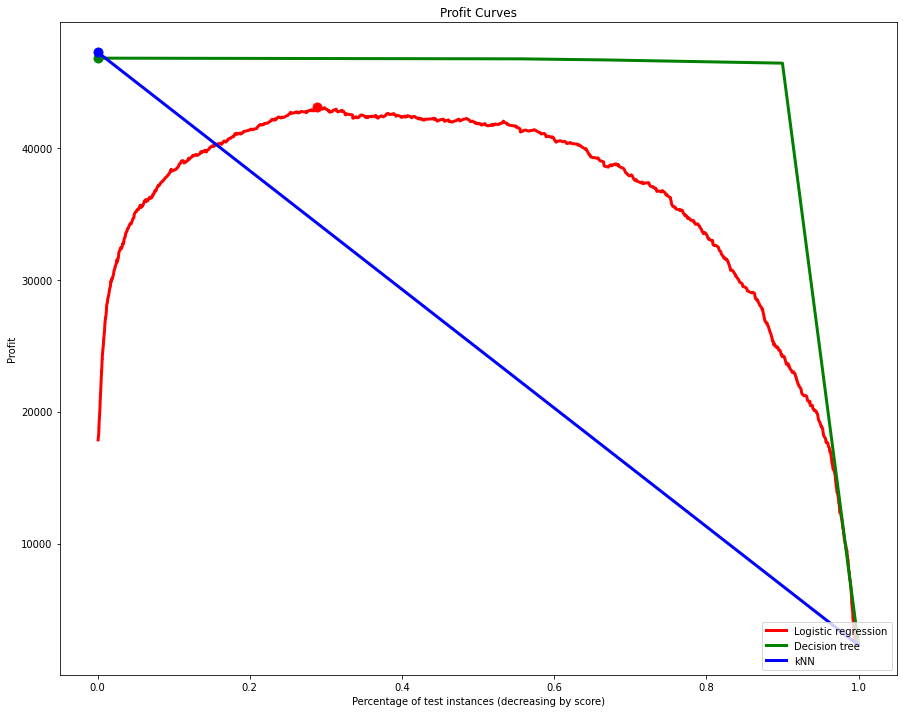

/Users/nigelsimida/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nigelsimida/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/nigelsimida/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nigelsimida/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [43]:
plt.figure(figsize=(15,12))
for i, model in enumerate(all_clf):
    plot_profit_curve(model, clf_labels[i], cost_benefit_cm,
                      X_train, X_test, y_train, y_test, colors[i])
plt.title("Profit Curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.show()

In [ ]:
def foo(*args):
    print('foo(',*args,')')
    
    def inside_foo(x):
        print('inside_foo')
        
        def inside_inside_foo(*args):
            print('inside_inside_foo(',*args,')')
            return x(*args)
        
        return inside_inside